import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from tensorflow.python.keras.layers.normalization import BatchNormalization
import numpy as np



In [36]:
def cnn():
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=(224,224,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
배치 데이터 크기: (20, 224, 224, 3)
배치 레이블 크기: (20,)
배치 레이블: 1.0


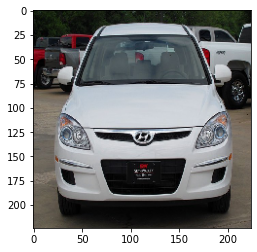

In [37]:
from IPython.display import Image, display, clear_output
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)   # 모든 이미지를 1/255로 스케일을 조정합니다
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "car-damage-dataset/data1a/training"
validation_dir = 'car-damage-dataset/data1a/validation'

train_generator = train_datagen.flow_from_directory( \
        train_dir,         # 타깃 디렉터리
        target_size=(224, 224),             # 모든 이미지를 150 × 150 크기
        batch_size=20 ,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    print('배치 레이블:', labels_batch[0])
    break
    
import matplotlib.pyplot as plt
plt.imshow( train_generator[0][0][0])
plt.show()



Epoch 1/5
92/92 [==============================] - 197s 2s/step - loss: 0.6676 - acc: 0.6234 - val_loss: 0.6422 - val_acc: 0.6391
Epoch 2/5
92/92 [==============================] - 99s 1s/step - loss: 0.6123 - acc: 0.6793 - val_loss: 0.5714 - val_acc: 0.7217
Epoch 3/5
92/92 [==============================] - 118s 1s/step - loss: 0.5382 - acc: 0.7413 - val_loss: 0.5118 - val_acc: 0.7435
Epoch 4/5
92/92 [==============================] - 114s 1s/step - loss: 0.4924 - acc: 0.7679 - val_loss: 0.4572 - val_acc: 0.7826
Epoch 5/5
92/92 [==============================] - 122s 1s/step - loss: 0.4366 - acc: 0.7929 - val_loss: 0.4544 - val_acc: 0.7957


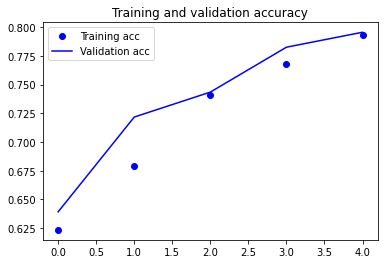

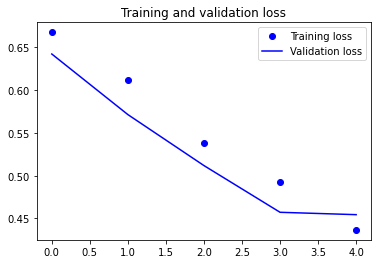

In [38]:
###########################################################
# 학습
###########################################################

model= cnn()

history = model.fit_generator(train_generator,
                             steps_per_epoch=int(1840/20),
                             epochs = 5,
                             validation_data = validation_generator,
                             validation_steps =int(460/20))

model.save_weights("cnn_model.h5") 


###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

########################################################
import matplotlib.pyplot as plt
# print( model.predict( [[  train_generator[10][0][0] ]]) ) #
# plt.imshow(  train_generator[10][0][0] )
# plt.show()

<PIL.Image.Image image mode=RGB size=224x224 at 0x23F2DD24D30>
(224, 224, 3)
(1, 224, 224, 3)
[[0.37534216]]
damage


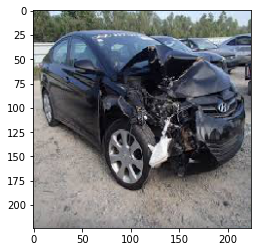

In [39]:
img_path = '0054.JPEG'
# 이미지를 4D 텐서로 변경
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(224, 224)) #224,224 픽셀로 크기 조절하여 load
print(img )
img_tensor = image.img_to_array(img) # numpy arrary 로 변환
print(img_tensor.shape) #(224, 224, 3)
img_tensor = np.expand_dims(img_tensor, axis=0) # 차원을 하나 더 늘림
img_tensor /= 255. # 모델이 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용
print(img_tensor.shape) # 이미지 텐서의 크기는 (1, 224, 224, 3)입니다
######################################################################
#예측
#######################################################################

model.load_weights("cnn_model.h5") #학습된 모델 로드
result = model.predict( img_tensor )
print(result)
if result < 0.5 :
     print("damage")
else :
     print("whole")
        
plt.imshow(img)
plt.show()